**Wrongful Conviction**
============================

Need To import all the Python Libraries for coding

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [104]:
df = pd.read_csv(r"C:\Users\turjo\Downloads\Wrongful_Con_US.csv")

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   caseID                      178 non-null    int64 
 1   Date of the Crime           178 non-null    int64 
 2   Defendants                  178 non-null    object
 3   Type of the Crime           178 non-null    object
 4   Location of the Crime       178 non-null    object
 5   Punishment for a crime      169 non-null    object
 6   Legally Exonerated          178 non-null    object
 7   Legally Exonerated Encoded  178 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 11.2+ KB


Df.info() and the code below can both help us find Colum names. However, df.info() gives us data types of the columns

In [106]:
for i,col in enumerate(df.columns):
    print (i+1," Col is ", col)

1  Col is  caseID
2  Col is  Date of the Crime
3  Col is  Defendants
4  Col is  Type of the Crime
5  Col is  Location of the Crime
6  Col is  Punishment for a crime
7  Col is  Legally Exonerated
8  Col is  Legally Exonerated Encoded


In [107]:
df.head()

,caseID,Date of the Crime,Defendants,Type of the Crime,Location of the Crime,Punishment for a crime,Legally Exonerated,Legally Exonerated Encoded
0,0,1805,Dominic Daley and James Halligan,murder,Massachusetts,death,yes,1
1,1,1843,John Gordon,murder,Rhode Island,death,yes,1
2,2,1855,Chief Leschi,murder,Washington,death,no,0
3,3,1863,Chipita Rodriguez,murder,Texas,death,yes,1
4,4,1872,William Jackson Marion,murder,Nebraska,death,yes,1


Check for NaN values 

In [108]:
df.isna().sum()

caseID                        0
Date of the Crime             0
Defendants                    0
Type of the Crime             0
Location of the Crime         0
Punishment for a crime        9
Legally Exonerated            0
Legally Exonerated Encoded    0
dtype: int64

As we can see there are 9 NaN values in Punishment for a Crime. Let us explore further to see if the are critical for our analysis. The command below will locate all the Nan values that are in Punishment for a crime column 

In [109]:
df[df['Punishment for a crime'].isna()]

,caseID,Date of the Crime,Defendants,Type of the Crime,Location of the Crime,Punishment for a crime,Legally Exonerated,Legally Exonerated Encoded
7,7,1894,George Washington Davis,sabotage of Locomotive 213,Nebraska,NaN,yes,1
9,9,1900,Caleb Powers,murder,Kentucky,NaN,yes,1
50,50,1980,Steve Titus,rape,Washington,NaN,yes,1
52,52,1980,Kern County child abuse cases,satanic ritual sex abuse,California,NaN,yes,1
71,71,1984,Employees of Fells Acres Day Care,satanic ritual sex abuse,Massachusetts,NaN,yes,1
79,79,1985,Beatrice Six,murder,Nebraska,NaN,yes,1
100,100,1989,"Central Park Five: Yusef Salaam, Antron McCray...","assault, rape",New York,NaN,yes,1
110,110,1991,Dixmoor 5,murder,Illinois,NaN,yes,1
174,174,2017,Alex Heineman,sexual assault,Wisconsin,NaN,yes,1


In [110]:
df['Punishment for a crime'] = df['Punishment for a crime'].fillna('No')

In [111]:
df.head(10)

,caseID,Date of the Crime,Defendants,Type of the Crime,Location of the Crime,Punishment for a crime,Legally Exonerated,Legally Exonerated Encoded
0,0,1805,Dominic Daley and James Halligan,murder,Massachusetts,death,yes,1
1,1,1843,John Gordon,murder,Rhode Island,death,yes,1
2,2,1855,Chief Leschi,murder,Washington,death,no,0
3,3,1863,Chipita Rodriguez,murder,Texas,death,yes,1
4,4,1872,William Jackson Marion,murder,Nebraska,death,yes,1
5,5,1886,"Oscar Neebe, August Spies, and Albert Parsons",haymarket affair,Illinois,15 years,yes,1
6,6,1887,Charles Hudspeth,murder,Arkansas,death,yes,1
7,7,1894,George Washington Davis,sabotage of Locomotive 213,Nebraska,No,yes,1
8,8,1896,Jack Davis,murder,Idaho,death,yes,1
9,9,1900,Caleb Powers,murder,Kentucky,No,yes,1


In [112]:
ndf = df.groupby(df['Location of the Crime']).count()['Defendants'].sort_values(ascending = False).head()


In [113]:
ndf = ndf.reset_index()

In [114]:
ndf.head()

,Location of the Crime,Defendants
0,Illinois,19
1,Texas,17
2,New York,16
3,California,10
4,North Carolina,9


<AxesSubplot:xlabel='Location of the Crime', ylabel='Defendants'>

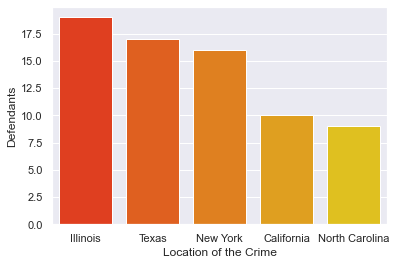

In [115]:
sns.barplot(y="Defendants",
    x="Location of the Crime", 
    data=ndf,
    palette="autumn")

Print indviudal Cols

In [116]:
df['Date of the Crime']

0      1805
1      1843
2      1855
3      1863
4      1872
       ... 
173    2016
174    2017
175    2017
176    2017
177    2017
Name: Date of the Crime, Length: 178, dtype: int64

Create new DataFrame and group by year and number of Defendants 

In [118]:
tdf = df.groupby(df['Date of the Crime']).count()['Defendants']
tdf = tdf.reset_index()

Plot Wrongfull convictions After world war 2

(1950.0, 2020.0)

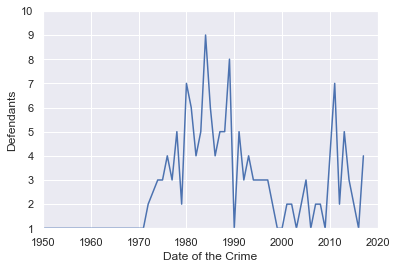

In [168]:
sns.lineplot(x = 'Date of the Crime', y = 'Defendants',data = tdf)
plt.ylim(1, 10)
plt.xlim(1950, 2020)

In [120]:
df['Type of the Crime'].nunique()

45

Top 5 types of Crimes

In [121]:
ttdf = df.groupby(df['Type of the Crime']).count()['Defendants'].sort_values(ascending = False).head()
ttdf = ttdf.reset_index()


<AxesSubplot:xlabel='Type of the Crime', ylabel='Defendants'>

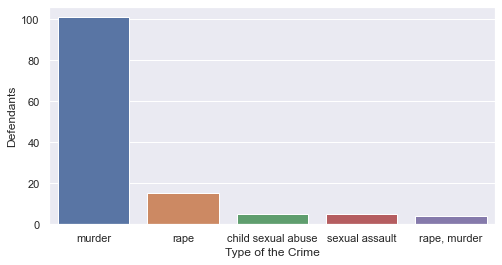

In [131]:
plt.figure(figsize = (8,4))
sns.barplot(x="Type of the Crime",
    y="Defendants", 
    data=ttdf,
    )



We can tell that most wrongful conviction was murder 

In [157]:
wdf = df.groupby(df['Type of the Crime']=='murder').count()['Legally Exonerated']
wdf = wdf.reset_index()


Text(0.5, 1.0, 'Exonerated for the Crime for Murders')

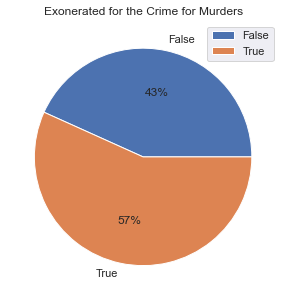

In [164]:
labels = 'False', 'True'
wdf.plot.pie(y='Legally Exonerated',labels=labels ,figsize=(5, 5),autopct='%.0f%%')
plt.ylabel(None)
plt.title('Exonerated for the Crime for Murders')


Need to work on this

In [176]:
locdf = df.groupby(df['Location of the Crime']=='Illinois').count()['Type of the Crime']
locdf = locdf.reset_index()